In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Load the data
df = pd.read_csv("SalesCallData.csv")

In [20]:
# Inspect the data
print(df.head())

   Abandoned Branch  Busy Hours  Busy Minutes  Total Wait Time Call Purpose  \
0          0  North    0.150000             9              3.0    Complaint   
1          0  North    0.150000             9              3.0    Complaint   
2          0  North    0.166667            10              6.0    Complaint   
3          0  South    0.166667            10              3.0    Complaint   
4          0  South    0.133333             8              7.0    Complaint   

   Calls  Hours  Incoming Wait Time Incoming or Outgoing  ...  \
0      1      9                 1.0             Incoming  ...   
1      1      9                 1.0             Incoming  ...   
2      1      9                 4.0             Incoming  ...   
3      1      9                 2.0             Incoming  ...   
4      1      9                 5.0             Incoming  ...   

   Not Ready Hours  Not Ready Minutes  Number of Records  Queue  \
0         0.033333                  2                  1      B   


In [26]:
# Inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Abandoned             559 non-null    int64  
 1   Branch                559 non-null    object 
 2   Busy Hours            559 non-null    float64
 3   Busy Minutes          559 non-null    int64  
 4   Total Wait Time       208 non-null    float64
 5   Call Purpose          559 non-null    object 
 6   Calls                 559 non-null    int64  
 7   Hours                 559 non-null    int64  
 8   Incoming Wait Time    208 non-null    float64
 9   Incoming or Outgoing  559 non-null    object 
 10  Lost Call (bin)       559 non-null    int64  
 11  Lost Call             559 non-null    int64  
 12  Not Ready Hours       559 non-null    float64
 13  Not Ready Minutes     559 non-null    int64  
 14  Number of Records     559 non-null    int64  
 15  Queue                 5

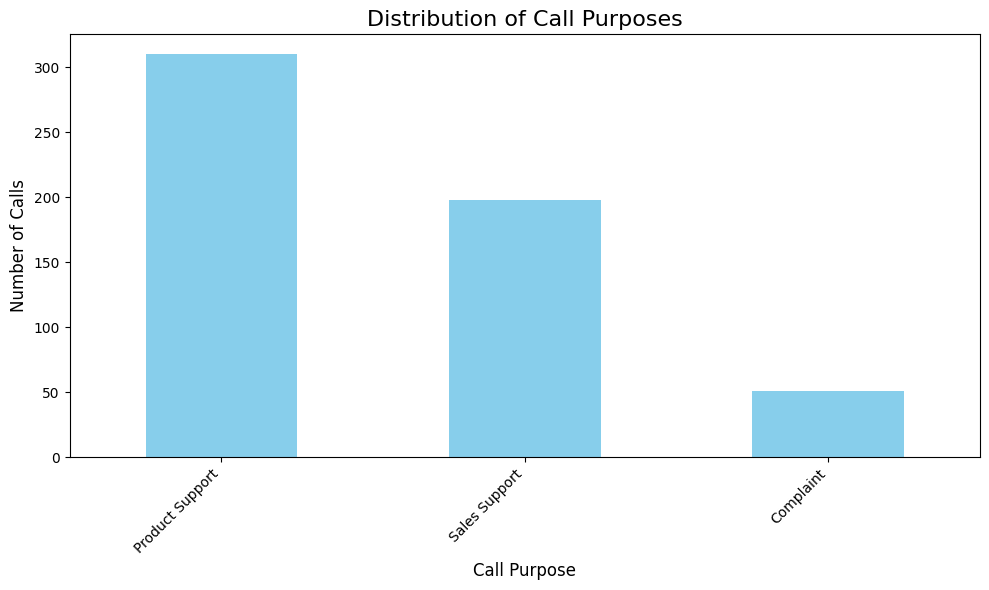

In [12]:
# Visualization 1: Call Purpose Breakdown
plt.figure(figsize=(10, 6))
call_purpose_counts = df['Call Purpose'].value_counts().sort_values(ascending=False)
call_purpose_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Call Purposes', fontsize=16)
plt.xlabel('Call Purpose', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

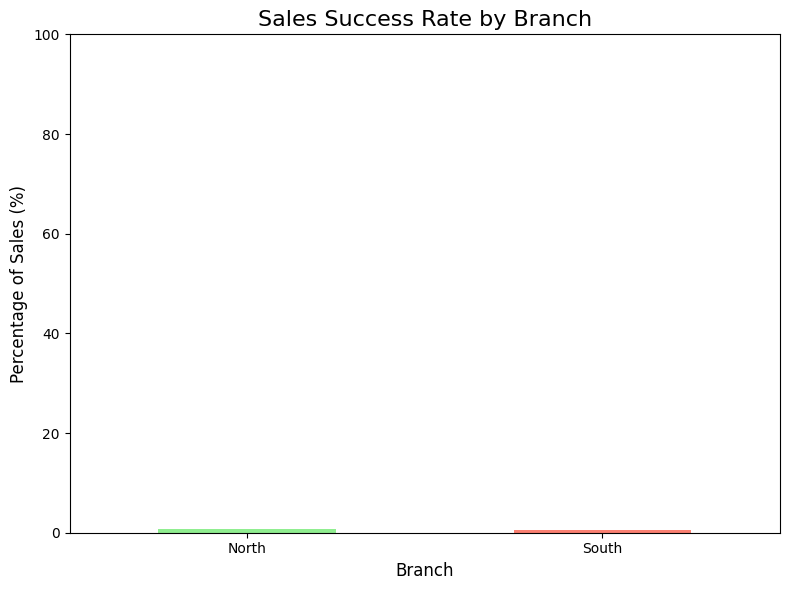

In [28]:
# Visualization 2: Sales Success by Branch
sales_by_branch = df.groupby('Branch')['Sale'].apply(lambda x: (x == 'YES').sum())
total_calls_by_branch = df.groupby('Branch')['Calls'].sum()
sale_rate = (sales_by_branch / total_calls_by_branch) * 100
sale_rate = sale_rate.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sale_rate.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Sales Success Rate by Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Percentage of Sales (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

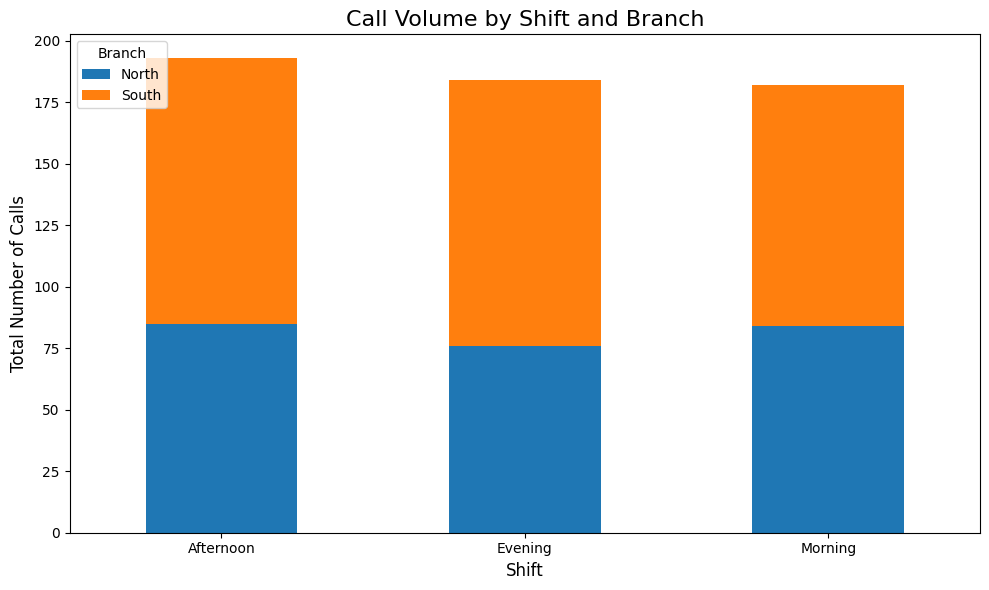

In [16]:
# Visualization 3: Call Volume by Shift and Branch
call_volume_by_shift_branch = df.groupby(['Shift', 'Branch'])['Calls'].sum().unstack()

plt.figure(figsize=(10, 6))
call_volume_by_shift_branch.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Call Volume by Shift and Branch', fontsize=16)
plt.xlabel('Shift', fontsize=12)
plt.ylabel('Total Number of Calls', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Branch', loc='upper left')
plt.tight_layout()
plt.show()